TITLE:- CLIMATE ANALYSIS

INTRODUCTION: Now a days limate varies time to time because of greenhouse gases and pollution. Climate analysis is the process of examining historical and climate data to understand trends, patterns, and variations in atmospheric conditions. It involves collecting, processing, and interpreting climate-related data such as temperature, humidity, wind speed, air quality and pressure over a specific period.

SCOPE: The ojective of this project is to find patterns and future temperature prediction using the machine learning models. In this, checks disaster frequency count in top countries,average humidty and air quality. This information will help us find the temperature and disaster frequency.

ATTRIBUTE INFORMATION: -->The dataset comprises 500 rows and 24 columns (features).
-->Each row represents the temperature and air quality.
-->Explore how factors such as location, date, air qaulity, temperature influence climate patterns.
-->The Temperature column is the target variable. It signifies the future temperature predictions.

In [93]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

In [95]:
# Import the data
# Shows top 5 records
import pandas as pd
data=pd.read_csv("Climate change.csv")
pd.set_option("display.max_columns",None)
data.head()

,date,season_month,location,temperature(°C),humidity(%),solar_radiation(Watts/m²),time_zone,weather_condition,wind_speed(m/s),pressure (hPa),wind_direction,disaster_frequency,event_intensity,co2 (ppm),methane (ppb),nitrogen_oxide(ppb),ozone(ppb),latitude(°),longitude(°),altitude(m),land_use_type,aerosol_concentration_pm2.5(µg/m³),aerosol_concentration_pm10(µg/m³),hydrofluorocarbons(ppt)
0,8/1/2013,Summer,Russia,9.82,5.07,795.60,Europe/Volgograd,Rainy,51.54,1004.55,West,3.36,Low,346.96,22.78,71.42,188.86,46.067503,44.416076,1213.62,Industrial,70.16,2.20,59.27
1,7/12/2008,Winter,Czech Republic,-12.45,27.35,1758.96,Europe/Prague,Cloudy,13.38,938.26,East,5.19,Medium,370.12,1.43,70.75,122.28,49.593172,17.126075,930.56,Commercial,92.14,14.03,48.75
2,7/7/2019,Spring,China,3.69,92.91,1052.80,Asia/Chongqing,Rainy,77.07,1084.95,West,6.61,High,382.53,46.63,83.04,84.08,30.916207,121.677640,981.89,Industrial,4.79,19.61,35.38
3,10/24/2024,Winter,Peru,36.38,56.22,323.94,America/Lima,Snowy,87.63,995.22,East,9.48,High,429.52,4.83,80.14,122.35,-6.850648,-76.344054,4518.66,Commercial,73.58,51.70,18.57
4,5/2/2019,Winter,Indonesia,18.92,43.28,1457.84,Asia/Jakarta,Cloudy,88.52,1081.95,East,4.57,Low,308.49,6.64,33.86,141.70,-7.762950,112.727130,4418.00,Residential,88.94,51.52,79.41


In [15]:
# Data size 
data.shape

(500, 24)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                500 non-null    object 
 1   season_month                        500 non-null    object 
 2   location                            500 non-null    object 
 3   temperature(°C)                     500 non-null    float64
 4   humidity(%)                         500 non-null    float64
 5   solar_radiation(Watts/m²)           500 non-null    float64
 6   time_zone                           500 non-null    object 
 7   weather_condition                   500 non-null    object 
 8   wind_speed(m/s)                     500 non-null    float64
 9   pressure (hPa)                      500 non-null    float64
 10  wind_direction                      500 non-null    object 
 11  disaster_frequency                  500 non-n

In [87]:
data.describe()

,temperature(°C),humidity(%),solar_radiation(Watts/m²),wind_speed(m/s),pressure (hPa),disaster_frequency,co2 (ppm),methane (ppb),nitrogen_oxide(ppb),ozone(ppb),latitude(°),longitude(°),altitude(m),aerosol_concentration_pm2.5(µg/m³),aerosol_concentration_pm10(µg/m³),hydrofluorocarbons(ppt)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,0.763940,51.541980,1023.004480,48.801620,1002.879900,4.923280,395.833920,24.50056,51.75822,98.47112,25.112648,43.310554,2497.165000,49.806540,49.24086,51.160720
std,28.346052,29.383476,595.936351,29.787053,59.642857,2.742195,57.481837,14.24286,28.36035,56.44097,24.486833,69.907782,1399.179081,29.911645,28.62402,29.238798
min,-49.910000,0.460000,7.670000,0.040000,900.540000,0.000000,300.110000,0.37000,0.80000,0.55000,-41.433222,-171.959628,5.630000,0.110000,0.05000,0.200000
25%,-22.135000,25.800000,486.790000,23.132500,950.865000,2.840000,348.777500,12.40250,26.85000,51.48500,7.410583,3.175881,1278.322500,22.460000,24.81750,24.475000
50%,-0.160000,51.765000,1032.740000,47.020000,1000.645000,4.855000,393.140000,23.97500,53.34500,98.85500,30.565129,37.648854,2562.435000,50.685000,48.40500,52.480000
75%,25.690000,77.225000,1561.235000,76.230000,1057.185000,7.190000,444.825000,36.47250,75.26250,144.32750,45.360766,110.839164,3616.425000,75.310000,73.64750,76.995000
max,49.980000,99.900000,1994.570000,99.870000,1099.300000,9.970000,498.310000,49.75000,99.65000,199.52000,68.966993,147.144088,4999.600000,99.950000,99.91000,99.580000


In [89]:
data.isnull().sum()

date                                  0
season_month                          0
location                              0
temperature(°C)                       0
humidity(%)                           0
solar_radiation(Watts/m²)             0
time_zone                             0
weather_condition                     0
wind_speed(m/s)                       0
pressure (hPa)                        0
wind_direction                        0
disaster_frequency                    0
event_intensity                       0
co2 (ppm)                             0
methane (ppb)                         0
nitrogen_oxide(ppb)                   0
ozone(ppb)                            0
latitude(°)                           0
longitude(°)                          0
altitude(m)                           0
land_use_type                         0
aerosol_concentration_pm2.5(µg/m³)    0
aerosol_concentration_pm10(µg/m³)     0
hydrofluorocarbons(ppt)               0
dtype: int64

In [ ]:
Observation: There are no null values in the dataset

In [23]:
data.duplicated().sum()

0

In [91]:
data.nunique()

date                                  487
season_month                            4
location                               84
temperature(°C)                       487
humidity(%)                           490
solar_radiation(Watts/m²)             499
time_zone                             118
weather_condition                       4
wind_speed(m/s)                       484
pressure (hPa)                        493
wind_direction                          4
disaster_frequency                    389
event_intensity                         3
co2 (ppm)                             496
methane (ppb)                         473
nitrogen_oxide(ppb)                   486
ozone(ppb)                            496
latitude(°)                           495
longitude(°)                          494
altitude(m)                           500
land_use_type                           3
aerosol_concentration_pm2.5(µg/m³)    489
aerosol_concentration_pm10(µg/m³)     490
hydrofluorocarbons(ppt)           

In [93]:
# Unique values in each category
for col in data.columns:
    unique_value=data[col].unique()
    print(f"{col}: ",unique_value)

date:  ['8/1/2013' '7/12/2008' '7/7/2019' '10/24/2024' '5/2/2019' '11/11/2024'
 '11/1/2016' '8/15/2013' '1/12/2023' '4/2/2022' '12/2/2021' '6/3/2016'
 '3/18/2022' '3/22/2019' '5/17/2008' '2/15/2005' '11/2/2023' '5/9/2022'
 '2/23/2016' '4/10/2008' '8/25/2007' '11/26/2008' '6/3/2009' '4/13/2008'
 '3/8/2022' '11/5/2006' '11/3/2016' '4/21/2014' '4/20/2017' '11/21/2010'
 '9/18/2007' '12/30/2015' '7/12/2023' '1/1/2005' '7/31/2016' '8/18/2019'
 '7/5/2023' '2/9/2012' '3/2/2021' '2/26/2010' '11/12/2013' '7/11/2015'
 '4/25/2012' '8/7/2011' '5/7/2013' '12/10/2014' '6/2/2010' '2/4/2022'
 '10/29/2021' '8/18/2010' '8/27/2019' '10/4/2006' '7/27/2015' '2/10/2016'
 '12/10/2006' '12/9/2012' '1/7/2020' '12/28/2006' '12/7/2006' '11/27/2011'
 '11/29/2016' '7/16/2020' '12/18/2006' '6/5/2023' '2/29/2016' '4/26/2015'
 '1/22/2014' '9/16/2024' '9/18/2017' '6/1/2011' '10/3/2010' '12/19/2005'
 '5/24/2008' '2/27/2022' '2/3/2022' '6/3/2023' '8/20/2014' '10/4/2022'
 '5/2/2013' '3/23/2008' '5/12/2018' '7/2/2024' '3/1

In [95]:
Numerical_feature=[feature for feature in data.columns if data[feature].dtype!='O']
Categorical_feature=[feature for feature in data.columns if data[feature].dtype=='O']

print("{} Numerical_features: {}".format(len(Numerical_feature),Numerical_feature))
print("\n{} Categorical_features: {}".format(len(Categorical_feature),Categorical_feature))

16 Numerical_features: ['temperature(°C)', 'humidity(%)', 'solar_radiation(Watts/m²)', 'wind_speed(m/s)', 'pressure (hPa)', 'disaster_frequency', 'co2 (ppm)', 'methane (ppb)', 'nitrogen_oxide(ppb)', 'ozone(ppb)', 'latitude(°)', 'longitude(°)', 'altitude(m)', 'aerosol_concentration_pm2.5(µg/m³)', 'aerosol_concentration_pm10(µg/m³)', 'hydrofluorocarbons(ppt)']

8 Categorical_features: ['date', 'season_month', 'location', 'time_zone', 'weather_condition', 'wind_direction', 'event_intensity', 'land_use_type']


In [9]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

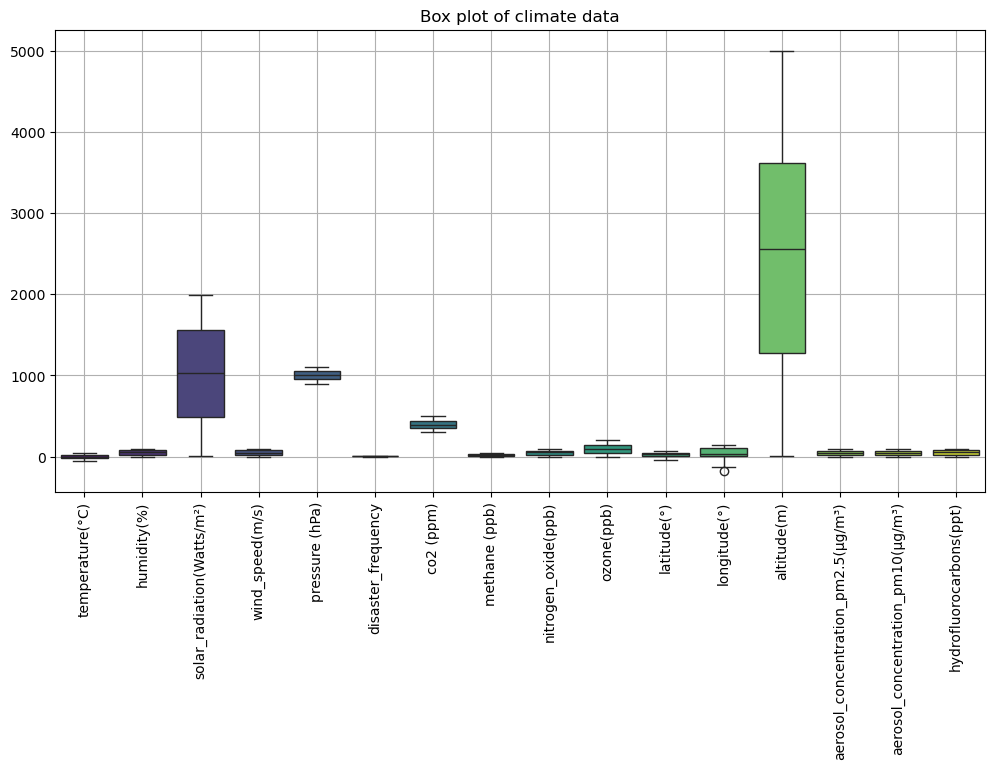

In [5]:
# Outlier Detection using Box Plot
# Box Plot of climate data with numerical features
plt.figure(figsize=(12,6))
sns.boxplot(data.select_dtypes(include=np.number),palette="viridis")
plt.xticks(rotation=90)
plt.title("Box plot of climate data")
plt.grid()
plt.show()

Lower bound:  -158.3190446875
Upper bound:  272.3340892125
Outlier in the longitude column:  [-171.9596279]


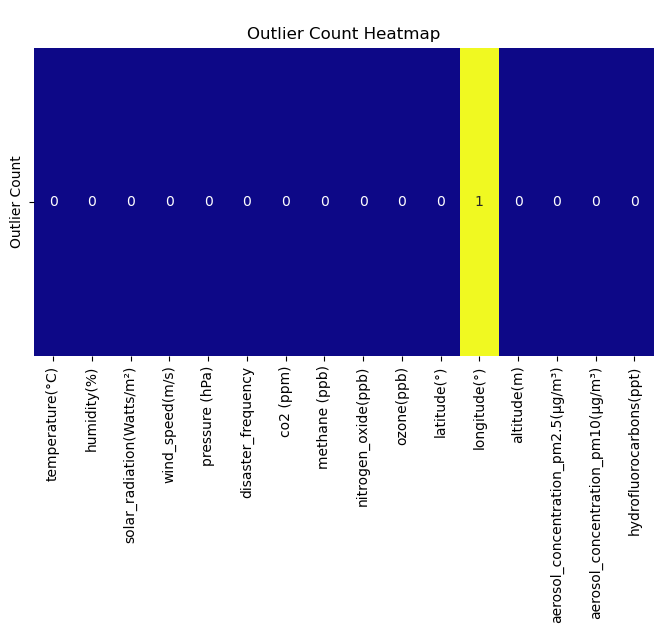

In [15]:
# Count number of outliers per column using IQR
# Identify the outlier in longitude column
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1=data['longitude(°)'].quantile(0.25)
Q3=data['longitude(°)'].quantile(0.75)
IQR = Q3-Q1
Lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR
outlier_longitude=data['longitude(°)'][(data['longitude(°)']<Lower_bound)|(data['longitude(°)']>Upper_bound)]

print('Lower bound: ',Lower_bound)
print('Upper bound: ',Upper_bound)
print('Outlier in the longitude column: ',outlier_longitude.values)

# Outlier Heatmap Visualization
Q1 = data.select_dtypes(include=np.number).quantile(0.25)
Q3 = data.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1
outliers = ((data.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (data.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).sum()
outlier_df = pd.DataFrame(outliers, columns=["Outlier Count"])

plt.figure(figsize=(8, 4))
sns.heatmap(outlier_df.T, cmap="plasma", annot=True, cbar=False)
plt.title("\nOutlier Count Heatmap")
plt.show()


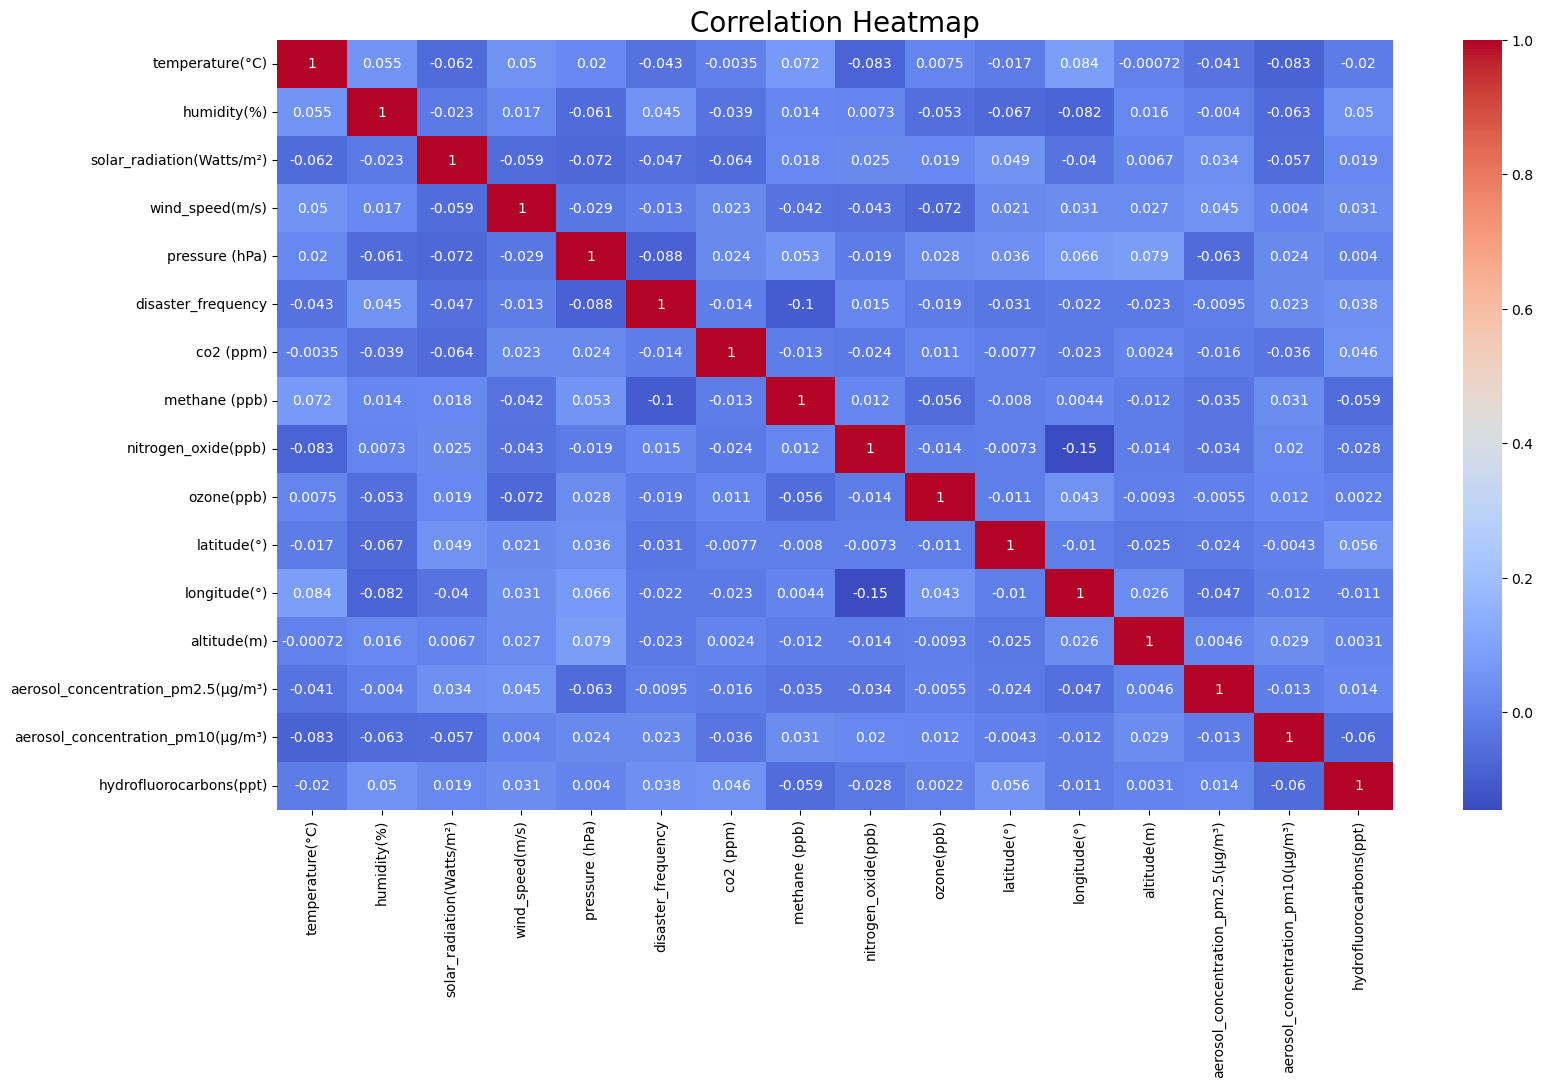

In [17]:
# Correlation heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.select_dtypes(include=np.number).corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap',fontsize=20)
plt.show()


In [67]:
data.head(1)

,date,season_month,location,temperature(°C),humidity(%),solar_radiation(Watts/m²),time_zone,weather_condition,wind_speed(m/s),pressure (hPa),wind_direction,disaster_frequency,event_intensity,co2 (ppm),methane (ppb),nitrogen_oxide(ppb),ozone(ppb),latitude(°),longitude(°),altitude(m),land_use_type,aerosol_concentration_pm2.5(µg/m³),aerosol_concentration_pm10(µg/m³),hydrofluorocarbons(ppt)
0,8/1/2013,Summer,Russia,9.82,5.07,795.6,Europe/Volgograd,Rainy,51.54,1004.55,West,3.36,Low,346.96,22.78,71.42,188.86,46.067503,44.416076,1213.62,Industrial,70.16,2.2,59.27


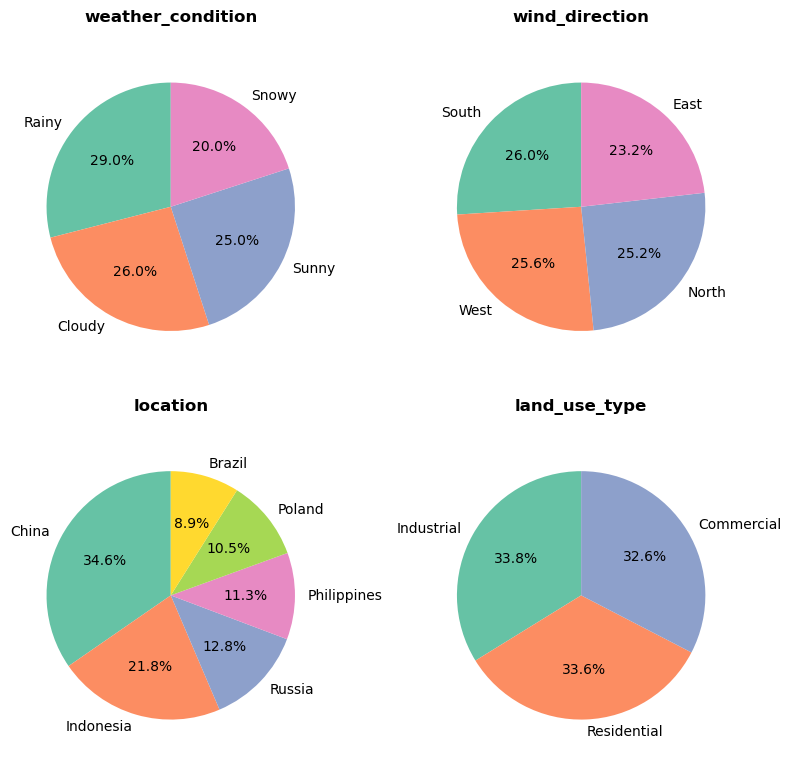

In [151]:
# Pie chart visualizations
import seaborn as sns
sns.set_palette("Set2")  

# List of categorical columns to plot
categorical_columns = ['weather_condition', 'wind_direction', 'location','land_use_type']

# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # Adjust rows, cols depending on the number of plots
axes = axes.flatten()  # Flattening for easy iteration
pastel_colors = sns.color_palette("Set2", n_colors=6)
for i, col in enumerate(categorical_columns):
    # Get the top 6 values
    top_values = data[col].value_counts().nlargest(6)
    # Plot pie chart for each
    top_values.plot(kind='pie', autopct='%1.1f%%', ax=axes[i], startangle=90, colors=pastel_colors)
    # Set title and label
    axes[i].set_title(f"{col}", fontweight='bold')
    axes[i].set_ylabel('') 
    axes[i].axis('equal')  

# Adjust layout
plt.tight_layout()
plt.show()


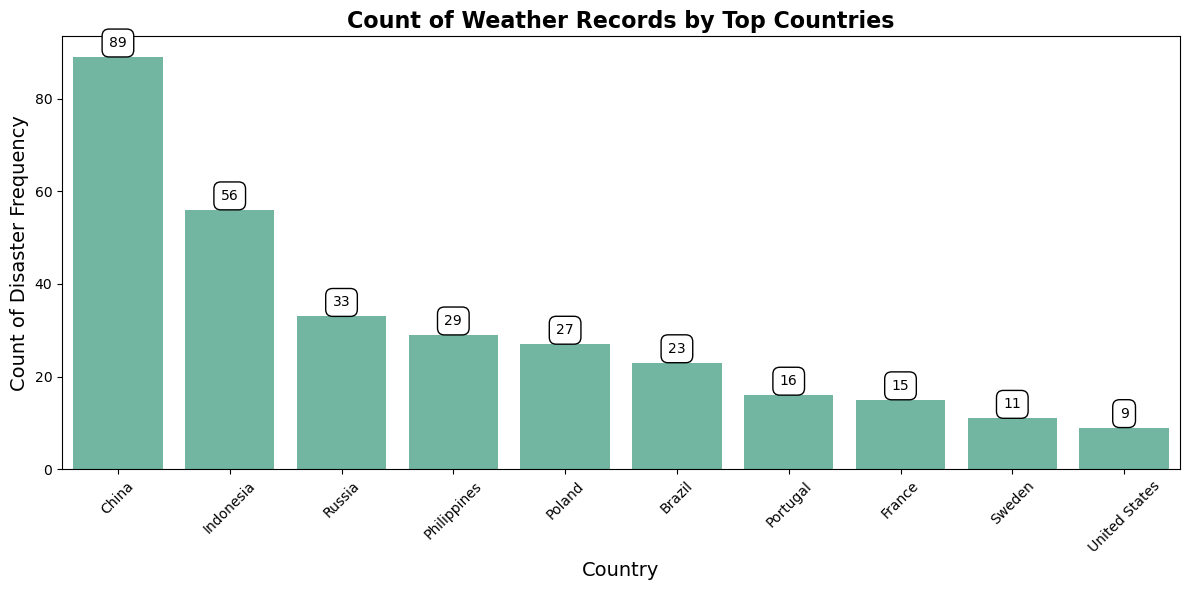

In [117]:
# Disasters in top 10 countries 
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set2") 
# Count the occurrences of each country
top_countries = data['location'].value_counts().nlargest(10).index 
filtered_data = data[data['location'].isin(top_countries)]  
# Create a count plot for the 'country' column
plt.figure(figsize=(12, 6))
country_counts = sns.countplot(data=filtered_data, x='location', order=top_countries)
# Add counts on top of each bar as a container
for p in country_counts.patches:
    count_value = int(p.get_height())
    country_counts.annotate(f'{count_value}', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='bottom', fontsize=10, color='black', 
                            xytext=(0, 5), textcoords='offset points',
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')) 
# Set title,labels and layout  
plt.title('Count of Weather Records by Top Countries', fontsize=16, fontweight='bold')  
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of Disaster Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


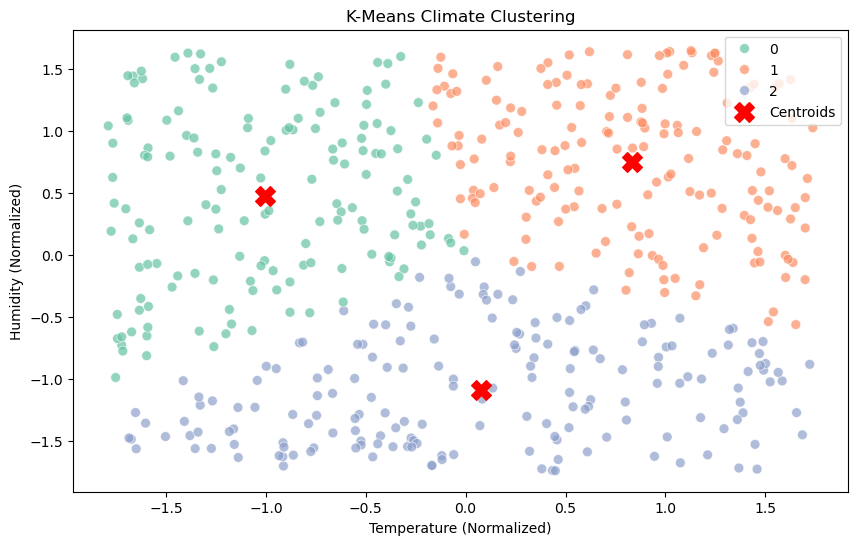

In [105]:
# KMeans Clustering for visualizing the Temperature and Humidity
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = data[['temperature(°C)', 'humidity(%)']].dropna().values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, init="k-means++", n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Get centroids
centroids = kmeans.cluster_centers_

# Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=data['Cluster'], palette='Set2', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Climate Clustering")
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Humidity (Normalized)")
plt.legend()
plt.show()


In [74]:
data.head(1)

,date,season_month,location,temperature(°C),humidity(%),solar_radiation(Watts/m²),time_zone,weather_condition,wind_speed(m/s),pressure (hPa),wind_direction,disaster_frequency,event_intensity,co2 (ppm),methane (ppb),nitrogen_oxide(ppb),ozone(ppb),latitude(°),longitude(°),altitude(m),land_use_type,aerosol_concentration_pm2.5(µg/m³),aerosol_concentration_pm10(µg/m³),hydrofluorocarbons(ppt),Cluster
0,8/1/2013,Summer,Russia,9.82,5.07,795.6,Europe/Volgograd,Rainy,51.54,1004.55,West,3.36,Low,346.96,22.78,71.42,188.86,46.067503,44.416076,1213.62,Industrial,70.16,2.2,59.27,5


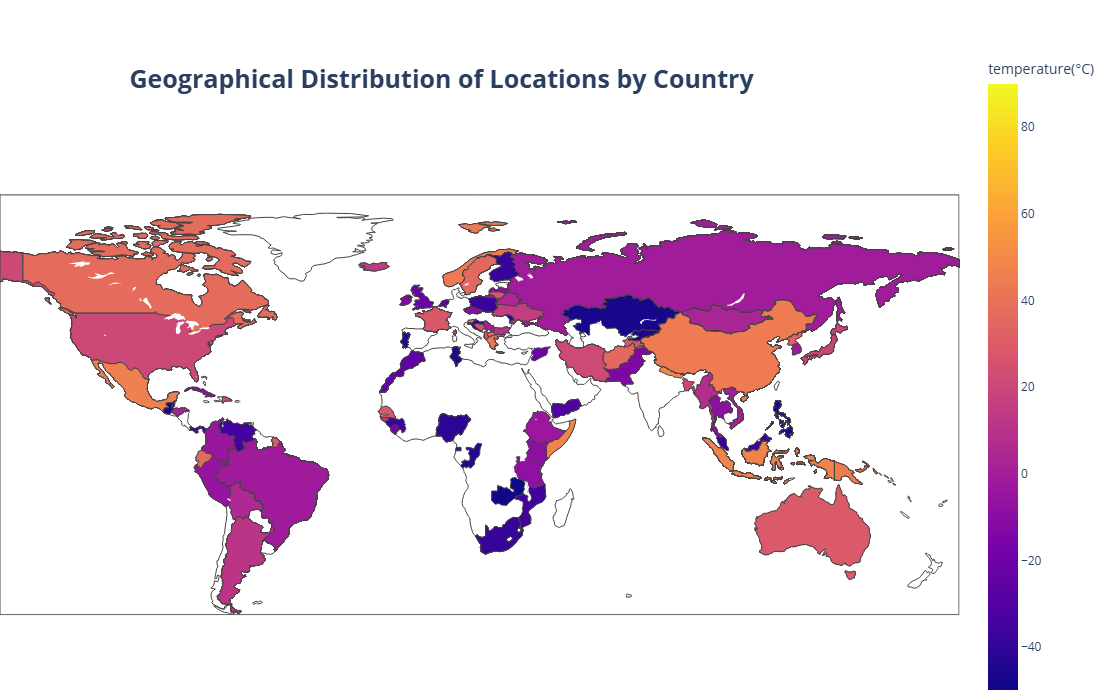

In [161]:
# Geographical Distribution of Locations by Country Temperature(°C)	
import plotly.express as px
# Find the row index of the highest and lowest temperature
max_temp = data['temperature(°C)'].max()
min_temp = data['temperature(°C)'].min()
# Create a geo map to visualize the locations
fig = px.choropleth(
    data,
    locations='location',  
    locationmode='country names',  
    color='temperature(°C)', 
    hover_name='location',  # Hover information
    title='<b>Geographical Distribution of Locations by Country</b>', 
    template='plotly_white',
    range_color=[max_temp,min_temp],  # Fixes the color mapping range
    color_continuous_midpoint=20  
)
# Update layout to remove the legend
fig.update_layout( title={'text': '<b>Geographical Distribution of Locations by Country</b>', 'x': 0.4, 'y':0.9,'font_size':25},
    width=1100,
    height=700,  
    margin={"r":0,"t":50,"l":0,"b":0} , showlegend=False)

# Show the plot
fig.show()

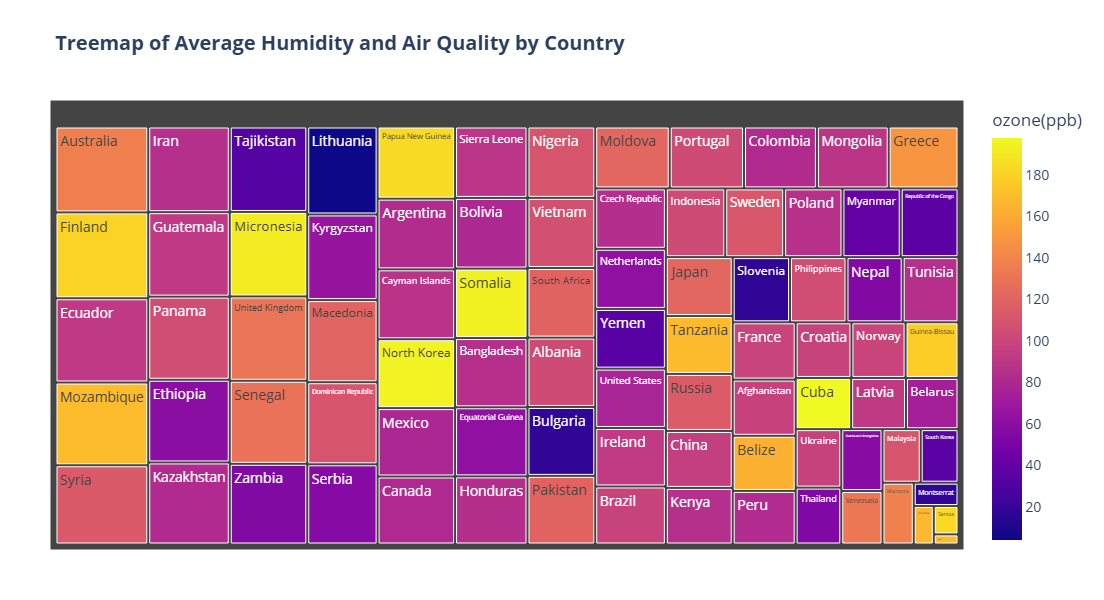

In [31]:
# Treemap of Average Humidity and Air Quality by Country
import plotly.express as px
# Calculate average humidity and air quality metrics by country
humidity_air_quality = data.groupby('location').agg({
    'humidity(%)': 'mean',
    'ozone(ppb)': 'mean',
    'nitrogen_oxide(ppb)': 'mean',
    'methane (ppb)': 'mean',
    'co2 (ppm)': 'mean'
}).reset_index()

# Create a treemap
fig = px.treemap(humidity_air_quality,
                 path=['location'],
                 values='humidity(%)',  
                 color='ozone(ppb)',  
                 hover_data=['humidity(%)', 'nitrogen_oxide(ppb)', 'methane (ppb)','co2 (ppm)'],
                 title='<b>Treemap of Average Humidity and Air Quality by Country</b>') 
# Increase figure size
fig.update_layout(
    width=1100, 
    height=600, 
    font=dict(size=14),  
    margin=dict(l=50, r=50, t=100, b=50)  # Add margin for better spacing
)
# Show the figure
fig.show()

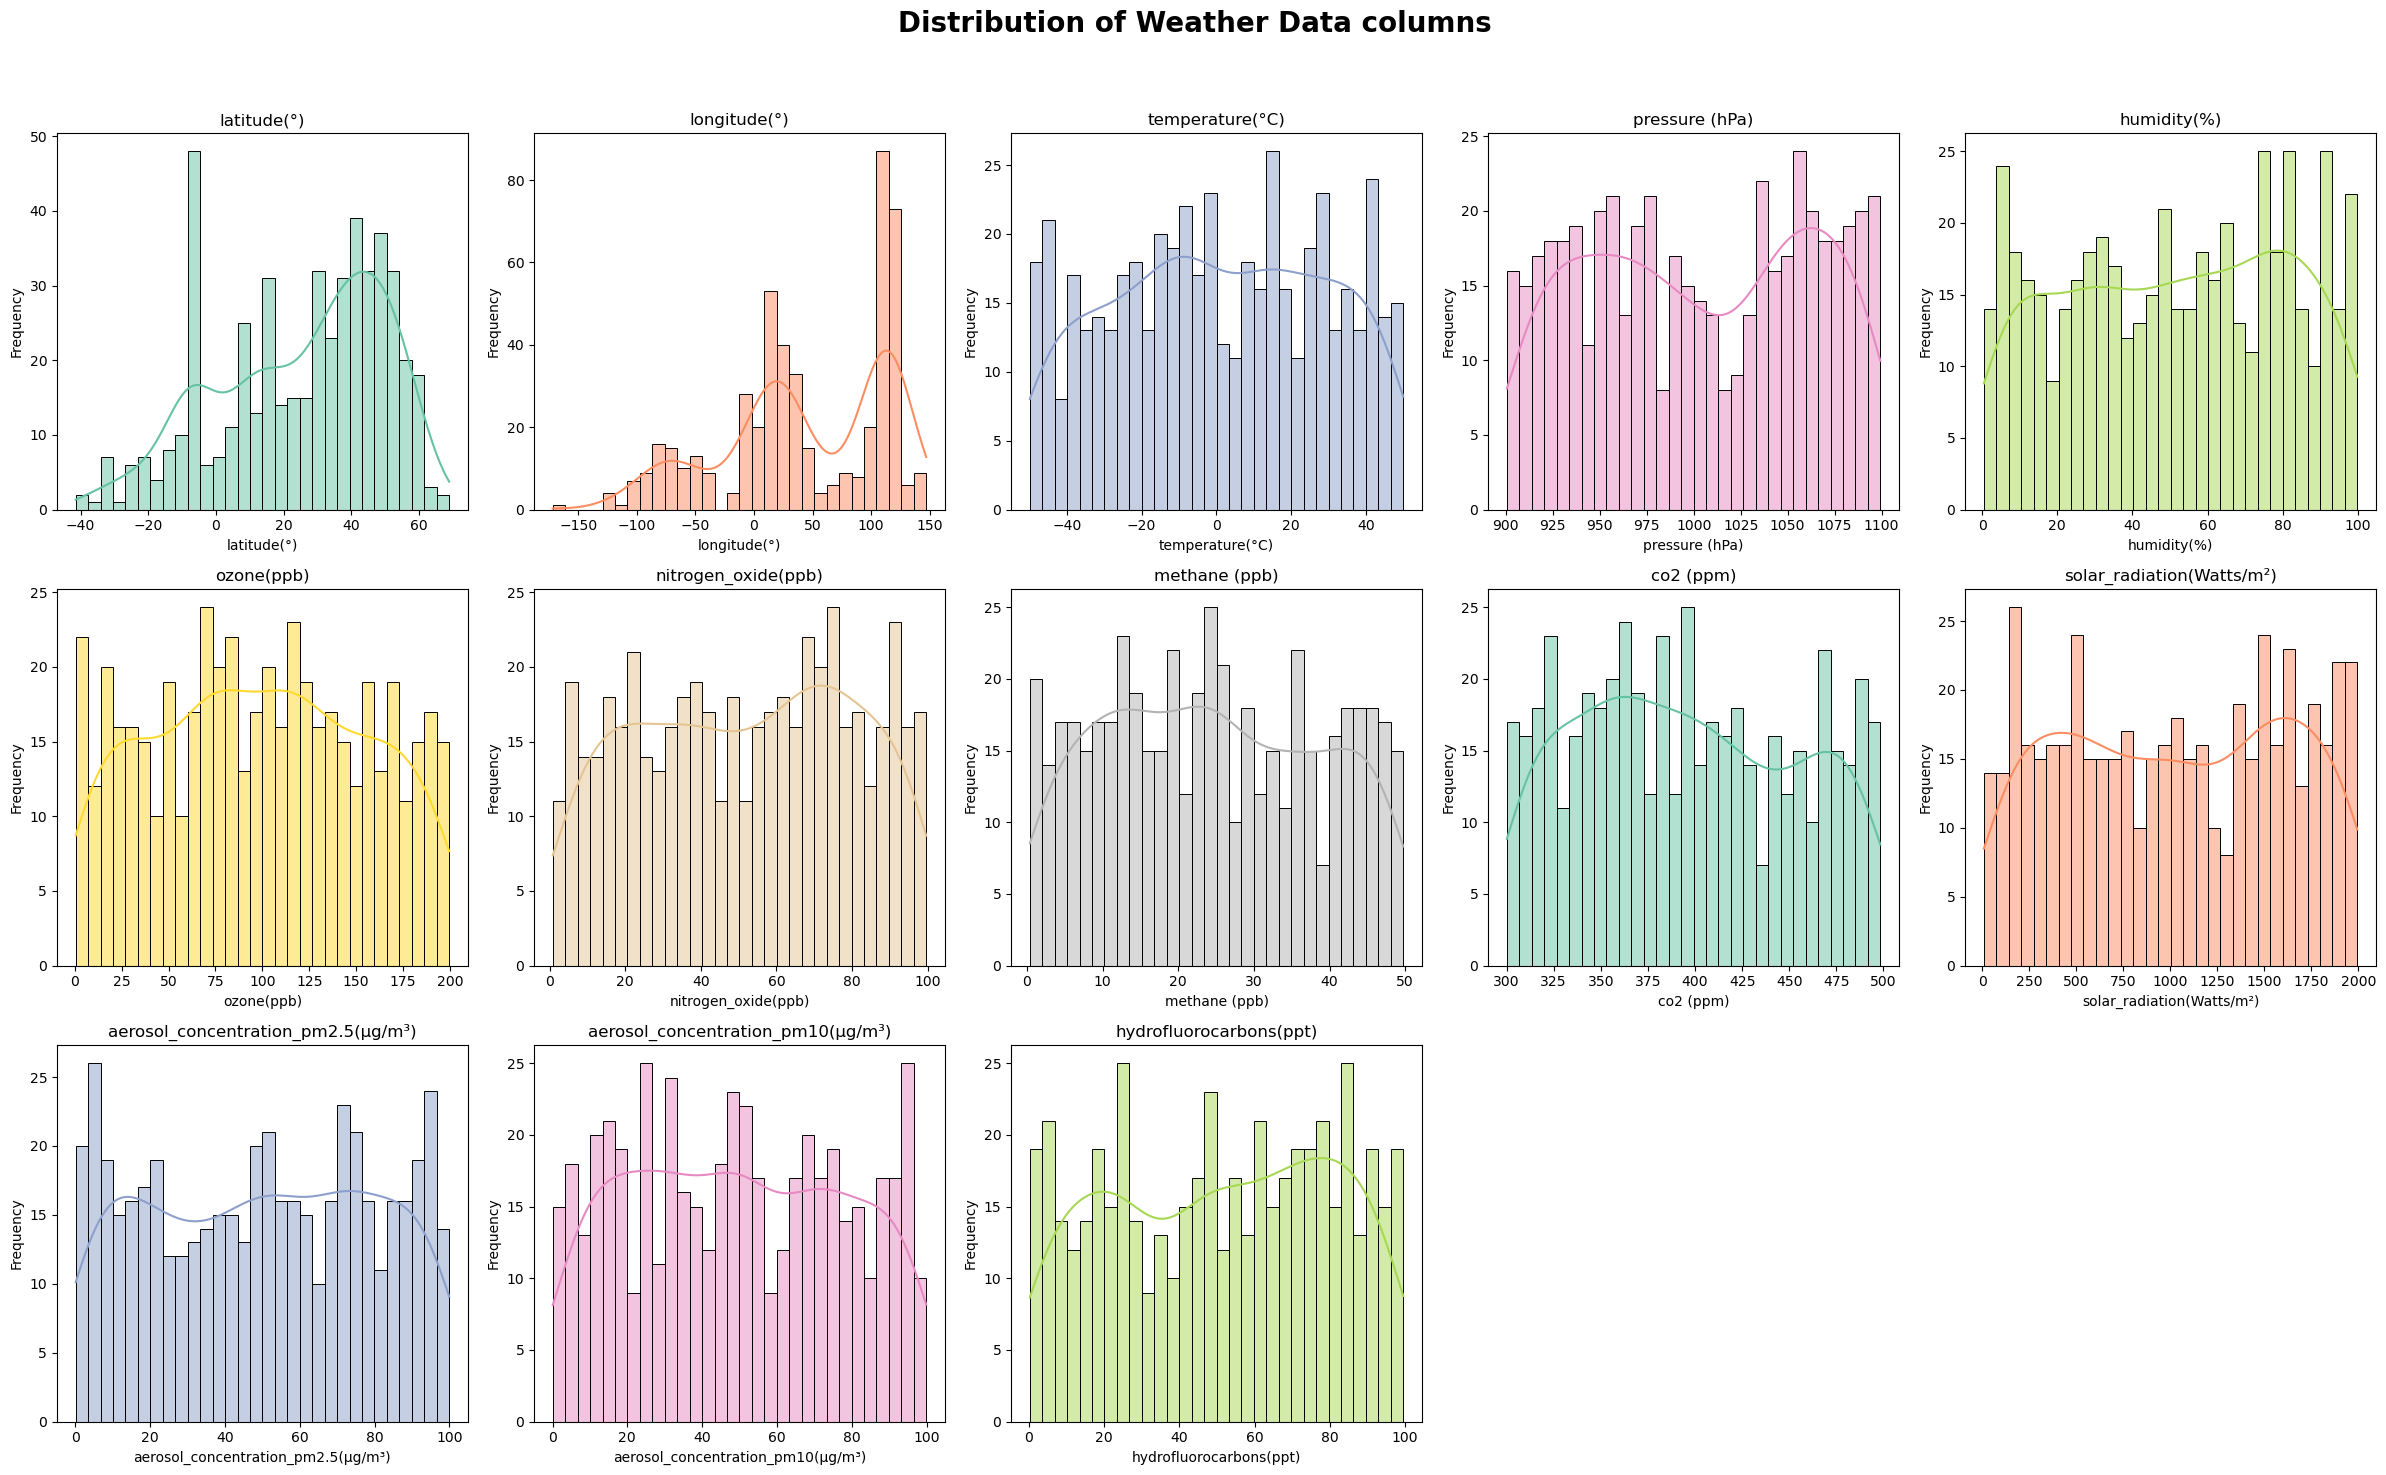

In [13]:
# Distribution of Weather Data Columns
# Specify the columns to visualize
selected_columns = ['latitude(°)', 'longitude(°)', 'temperature(°C)','pressure (hPa)','humidity(%)', 'ozone(ppb)',
                    'nitrogen_oxide(ppb)', 'methane (ppb)','co2 (ppm)','solar_radiation(Watts/m²)','aerosol_concentration_pm2.5(µg/m³)',
                    'aerosol_concentration_pm10(µg/m³)','hydrofluorocarbons(ppt)']

# Create a figure for the subplots
n_cols = 5
n_rows = (len(selected_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

# Get the SET2 color palette
set2_palette = sns.color_palette("Set2", n_colors=len(selected_columns))

# Loop through the selected columns and create plots
for i, col in enumerate(selected_columns):
    sns.histplot(data[col], ax=axes[i], bins=30, kde=True, color=set2_palette[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add the title and Adjust layout
plt.suptitle('Distribution of Weather Data columns', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

In [69]:
from sklearn.preprocessing import LabelEncoder
Categorical_col=data[['season_month','location','weather_condition','wind_direction','land_use_type','time_zone','event_intensity']]
le=LabelEncoder()
for col in Categorical_col:
    data[f'{col}']=le.fit_transform(data[col])
    print(data[[f'{col}']].head())

   season_month
0             2
1             3
2             1
3             3
4             3
   location
0        62
1        17
2        13
3        57
4        30
   weather_condition
0                  1
1                  0
2                  1
3                  2
4                  0
   wind_direction
0               3
1               0
2               3
3               0
4               0
   land_use_type
0              1
1              0
2              1
3              0
4              2
   time_zone
0        111
1        102
2         55
3         34
4         61
   event_intensity
0                1
1                2
2                0
3                0
4                1


In [37]:
#  highest recorded wind speed according to this Dataset
max_wind_country = data.loc[data['wind_speed(m/s)'].idxmax(), ['date','location', 'wind_speed(m/s)','weather_condition','temperature(°C)']]
print("Highest Wind speed in the Dataset:")
pd.DataFrame(max_wind_country)

Highest Wind speed in the Dataset:


,400
date,293
location,2
wind_speed(m/s),99.87
weather_condition,0
temperature(°C),11.36


In [35]:
# highest recorded Co2, Methane, Nitrogen Dioxide and Ozon level according to this Dataset
features=data[['co2 (ppm)','methane (ppb)','nitrogen_oxide(ppb)','ozone(ppb)']]
for col in features:
    Highest_records = data.loc[data[col].idxmax(), ['location',  col]]
    print(f"Highest recorded {col}:\n")
    print(Highest_records.to_frame().T) 
    print("\n" + "="*50 )

Highest recorded co2 (ppm):

    location co2 (ppm)
448  Vietnam    498.31

Highest recorded methane (ppb):

    location methane (ppb)
134   Canada         49.75

Highest recorded nitrogen_oxide(ppb):

     location nitrogen_oxide(ppb)
408  Honduras               99.65

Highest recorded ozone(ppb):

    location ozone(ppb)
293  Albania     199.52



In [29]:
# Maximum and Minimum temperature recorded for locations according to this Dataset
temp_extremes = data.groupby(['location'])['temperature(°C)'].agg(['max', 'min']).reset_index().head()
pd.DataFrame(temp_extremes)

,location,max,min
0,Afghanistan,35.72,-5.62
1,Albania,32.26,-23.67
2,Argentina,11.36,-31.27
3,Australia,29.32,29.32
4,Bangladesh,20.10,20.10


In [43]:
# Lets calculate Correlation Between the weather condition and temperature
data['weather_condition'] = data['weather_condition']
temp_time_correlation = data[['weather_condition', 'temperature(°C)']].corr().iloc[0, 1]
print(f'Correlation between last updated time and temperature: {temp_time_correlation}')

Correlation between last updated time and temperature: 0.030822531038321704


In [99]:
from sklearn.preprocessing import LabelEncoder
Categorical_col=data[['date','season_month','location','weather_condition','wind_direction','land_use_type','time_zone','event_intensity']]
le=LabelEncoder()
for col in Categorical_col:
    data[f'{col}']=le.fit_transform(data[col])
    print(data[[f'{col}']].head())

   date
0   394
1   348
2   388
3    58
4   280
   season_month
0             2
1             3
2             1
3             3
4             3
   location
0        62
1        17
2        13
3        57
4        30
   weather_condition
0                  1
1                  0
2                  1
3                  2
4                  0
   wind_direction
0               3
1               0
2               3
3               0
4               0
   land_use_type
0              1
1              0
2              1
3              0
4              2
   time_zone
0        111
1        102
2         55
3         34
4         61
   event_intensity
0                1
1                2
2                0
3                0
4                1


In [209]:
data.head(1)

,date,season_month,location,temperature(°C),humidity(%),solar_radiation(Watts/m²),time_zone,weather_condition,wind_speed(m/s),pressure (hPa),wind_direction,disaster_frequency,event_intensity,co2 (ppm),methane (ppb),nitrogen_oxide(ppb),ozone(ppb),latitude(°),longitude(°),altitude(m),land_use_type,aerosol_concentration_pm2.5(µg/m³),aerosol_concentration_pm10(µg/m³),hydrofluorocarbons(ppt),Cluster
0,2013-08-01,Summer,Russia,9.82,5.07,795.6,Europe/Volgograd,Rainy,51.54,1004.55,West,3.36,Low,346.96,22.78,71.42,188.86,46.067503,44.416076,1213.62,Industrial,70.16,2.2,59.27,2


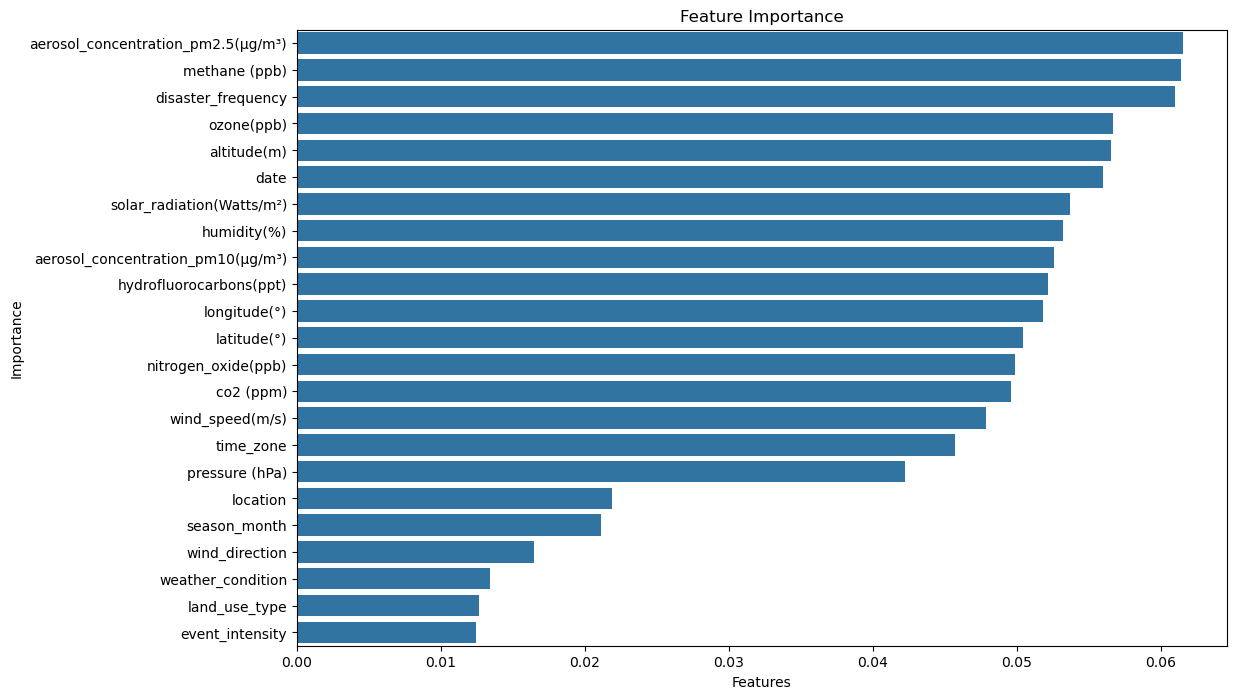

In [167]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
x=data.drop(columns=['temperature(°C)'])
y=data["temperature(°C)"]
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x,y)
feature_importance=pd.DataFrame(rf.feature_importances_, index=x.columns, columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(y=feature_importance.index, x=feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


Observation: Feature Importance gives the importance of each feature to the Temperature.
-> The highest importance feature is aerosol_concentration_pm2.5(µg/m³).
-> The highest correlation between feature and targest is 0.065.
-> The lowest correlation is event intensity of 0.013

In [177]:
# Linear Regression and model prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
X=data.drop(columns=['aerosol_concentration_pm2.5(µg/m³)','methane (ppb)'])
y=data['temperature(°C)']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create and train the SVM model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

R2_score = r2_score(y_test, y_pred)
Mse=mean_absolute_error(y_test, y_pred)
Mae=mean_absolute_error(y_test, y_pred)
print('Linear regression:')
print(f"R2_score: {R2_score:.2f}")
print(f"Mean Squared Error: {Mse:.2f}")
print(f"Mean Sbsolute Error: {Mae:.2f}")



Linear regression:
R2_score: 1.00
Mean Squared Error: 4.27
Mean Sbsolute Error: 4.27


In [175]:
# Random Forest Regressor and temperature prediction
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
y_pred=rf.predict(X_test_scaled)

R2_score = r2_score(y_test, y_pred)
Mse=mean_absolute_error(y_test, y_pred)
Mae=mean_absolute_error(y_test, y_pred)
print('Random Forest:')
print(f"R2_score: {R2_score:.2f}")
print(f"Mean Squared Error: {Mse:.2f}")
print(f"Mean Sbsolute Error: {Mae:.2f}")

Random Forest:
R2_score: 1.00
Mean Squared Error: 1.38
Mean Sbsolute Error: 1.38


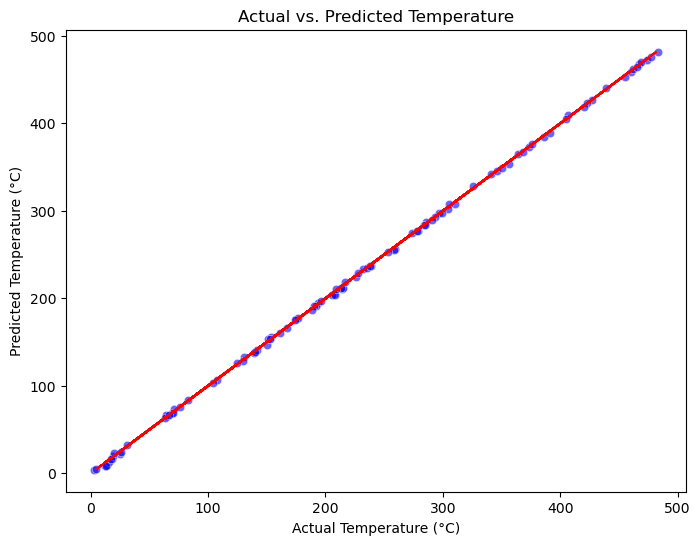

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot(y_test, y_test, color='red', linestyle='dashed')
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs. Predicted Temperature")
plt.show()


Conclusion: The Climate change modelling predicts the future temperature by using the machine learning model are Linear Regression and Random Forest Regressor.The Random forest regressor gives the good accuracy than linear regression in error values. In this project, analyse the top disaster frequency count in top 10 countries and weather conditions.The line chart visualizations shows the the actual temperature vs predicted temperature, it gives a linear line temperature. This project helps to analysis the climate changes in different locations. 